In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import path
import pandas as pd
from pandas.api.types import CategoricalDtype

In [10]:
original_path = os.getcwd()
# plotting object (if needed)
plt.style.use('seaborn-white')
sns.set_palette("tab10")
plt.rcParams.update({'font.size': 12})

/tmp/ipykernel_128382/1149465841.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Joining all data:

In [11]:
def join_all_data(kinds = ["KS", "LR", "BFF", "FBST"], 
                  models = ["normal", "gmm", "lognormal"]):
    data_list = []
    # folder path
    for kind in kinds:
        data_list_model = []
        for model in models:
            data_path = original_path + f"/temp_data/{kind}_mae_stats_{model}.csv"
            data_list_model.append(pd.read_csv(data_path).assign(model = model))
        df_all_models = pd.concat(data_list_model)
        data_list.append(df_all_models.assign(kind = kind))
    all_df = pd.concat(data_list)
    # Print the concatenated data frame
    print(all_df.head(5))
    return all_df

Printing the first 5 rows:

In [12]:
all_stats_data = join_all_data()

          methods  N     B       MAE        se   model kind
0          LOCART  5  1000  0.019977  0.000319  normal   KS
1        LOFOREST  5  1000  0.008893  0.000202  normal   KS
2  tuned LOFOREST  5  1000  0.008893  0.000202  normal   KS
3        boosting  5  1000  0.025047  0.000898  normal   KS
4     monte-carlo  5  1000  0.008909  0.000203  normal   KS


In [13]:
all_stats_data.head(6)

,methods,N,B,MAE,se,model,kind
0,LOCART,5,1000,0.019977,0.000319,normal,KS
1,LOFOREST,5,1000,0.008893,0.000202,normal,KS
2,tuned LOFOREST,5,1000,0.008893,0.000202,normal,KS
3,boosting,5,1000,0.025047,0.000898,normal,KS
4,monte-carlo,5,1000,0.008909,0.000203,normal,KS
5,asymptotic,5,1000,0.036244,0.000136,normal,KS


In [14]:
method_custom_order = CategoricalDtype(
    ["LOCART", "LOFOREST", "tuned LOFOREST", "boosting", "monte-carlo",
    "asymptotic"], 
    ordered=True)
all_stats_data['methods'] = all_stats_data['methods'].astype(method_custom_order)

In [15]:
all_stats_data["methods"] = all_stats_data["methods"].cat.rename_categories(
    {'LOCART':'TRUST', 'LOFOREST':'TRUST++', 'tuned LOFOREST':'Tuned TRUST++'})

In [16]:
filtered_data = all_stats_data.groupby(['N', 'B', 'model', 'kind'], as_index=False).apply(lambda df: df.nsmallest(n = 1, columns = 'MAE', keep = "all"))
method_counts = filtered_data.value_counts(["N", "B", "methods"])

In [17]:
method_counts_data = method_counts.reset_index()

In [18]:
method_counts_data.methods

0     Tuned TRUST++
1     Tuned TRUST++
2     Tuned TRUST++
3     Tuned TRUST++
4     Tuned TRUST++
          ...      
71         boosting
72          TRUST++
73      monte-carlo
74      monte-carlo
75         boosting
Name: methods, Length: 76, dtype: category
Categories (6, object): ['TRUST' < 'TRUST++' < 'Tuned TRUST++' < 'boosting' < 'monte-carlo' < 'asymptotic']

In [19]:
method_counts_data

,N,B,methods,count
0,10,10000,Tuned TRUST++,10
1,50,10000,Tuned TRUST++,8
2,10,15000,Tuned TRUST++,7
3,100,15000,Tuned TRUST++,7
4,10,5000,Tuned TRUST++,7
...,...,...,...,...
71,5,15000,boosting,1
72,10,5000,TRUST++,1
73,10,5000,monte-carlo,1
74,50,1000,monte-carlo,1


Plotting barplot:

/home/kuben45/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_128382/1992850448.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


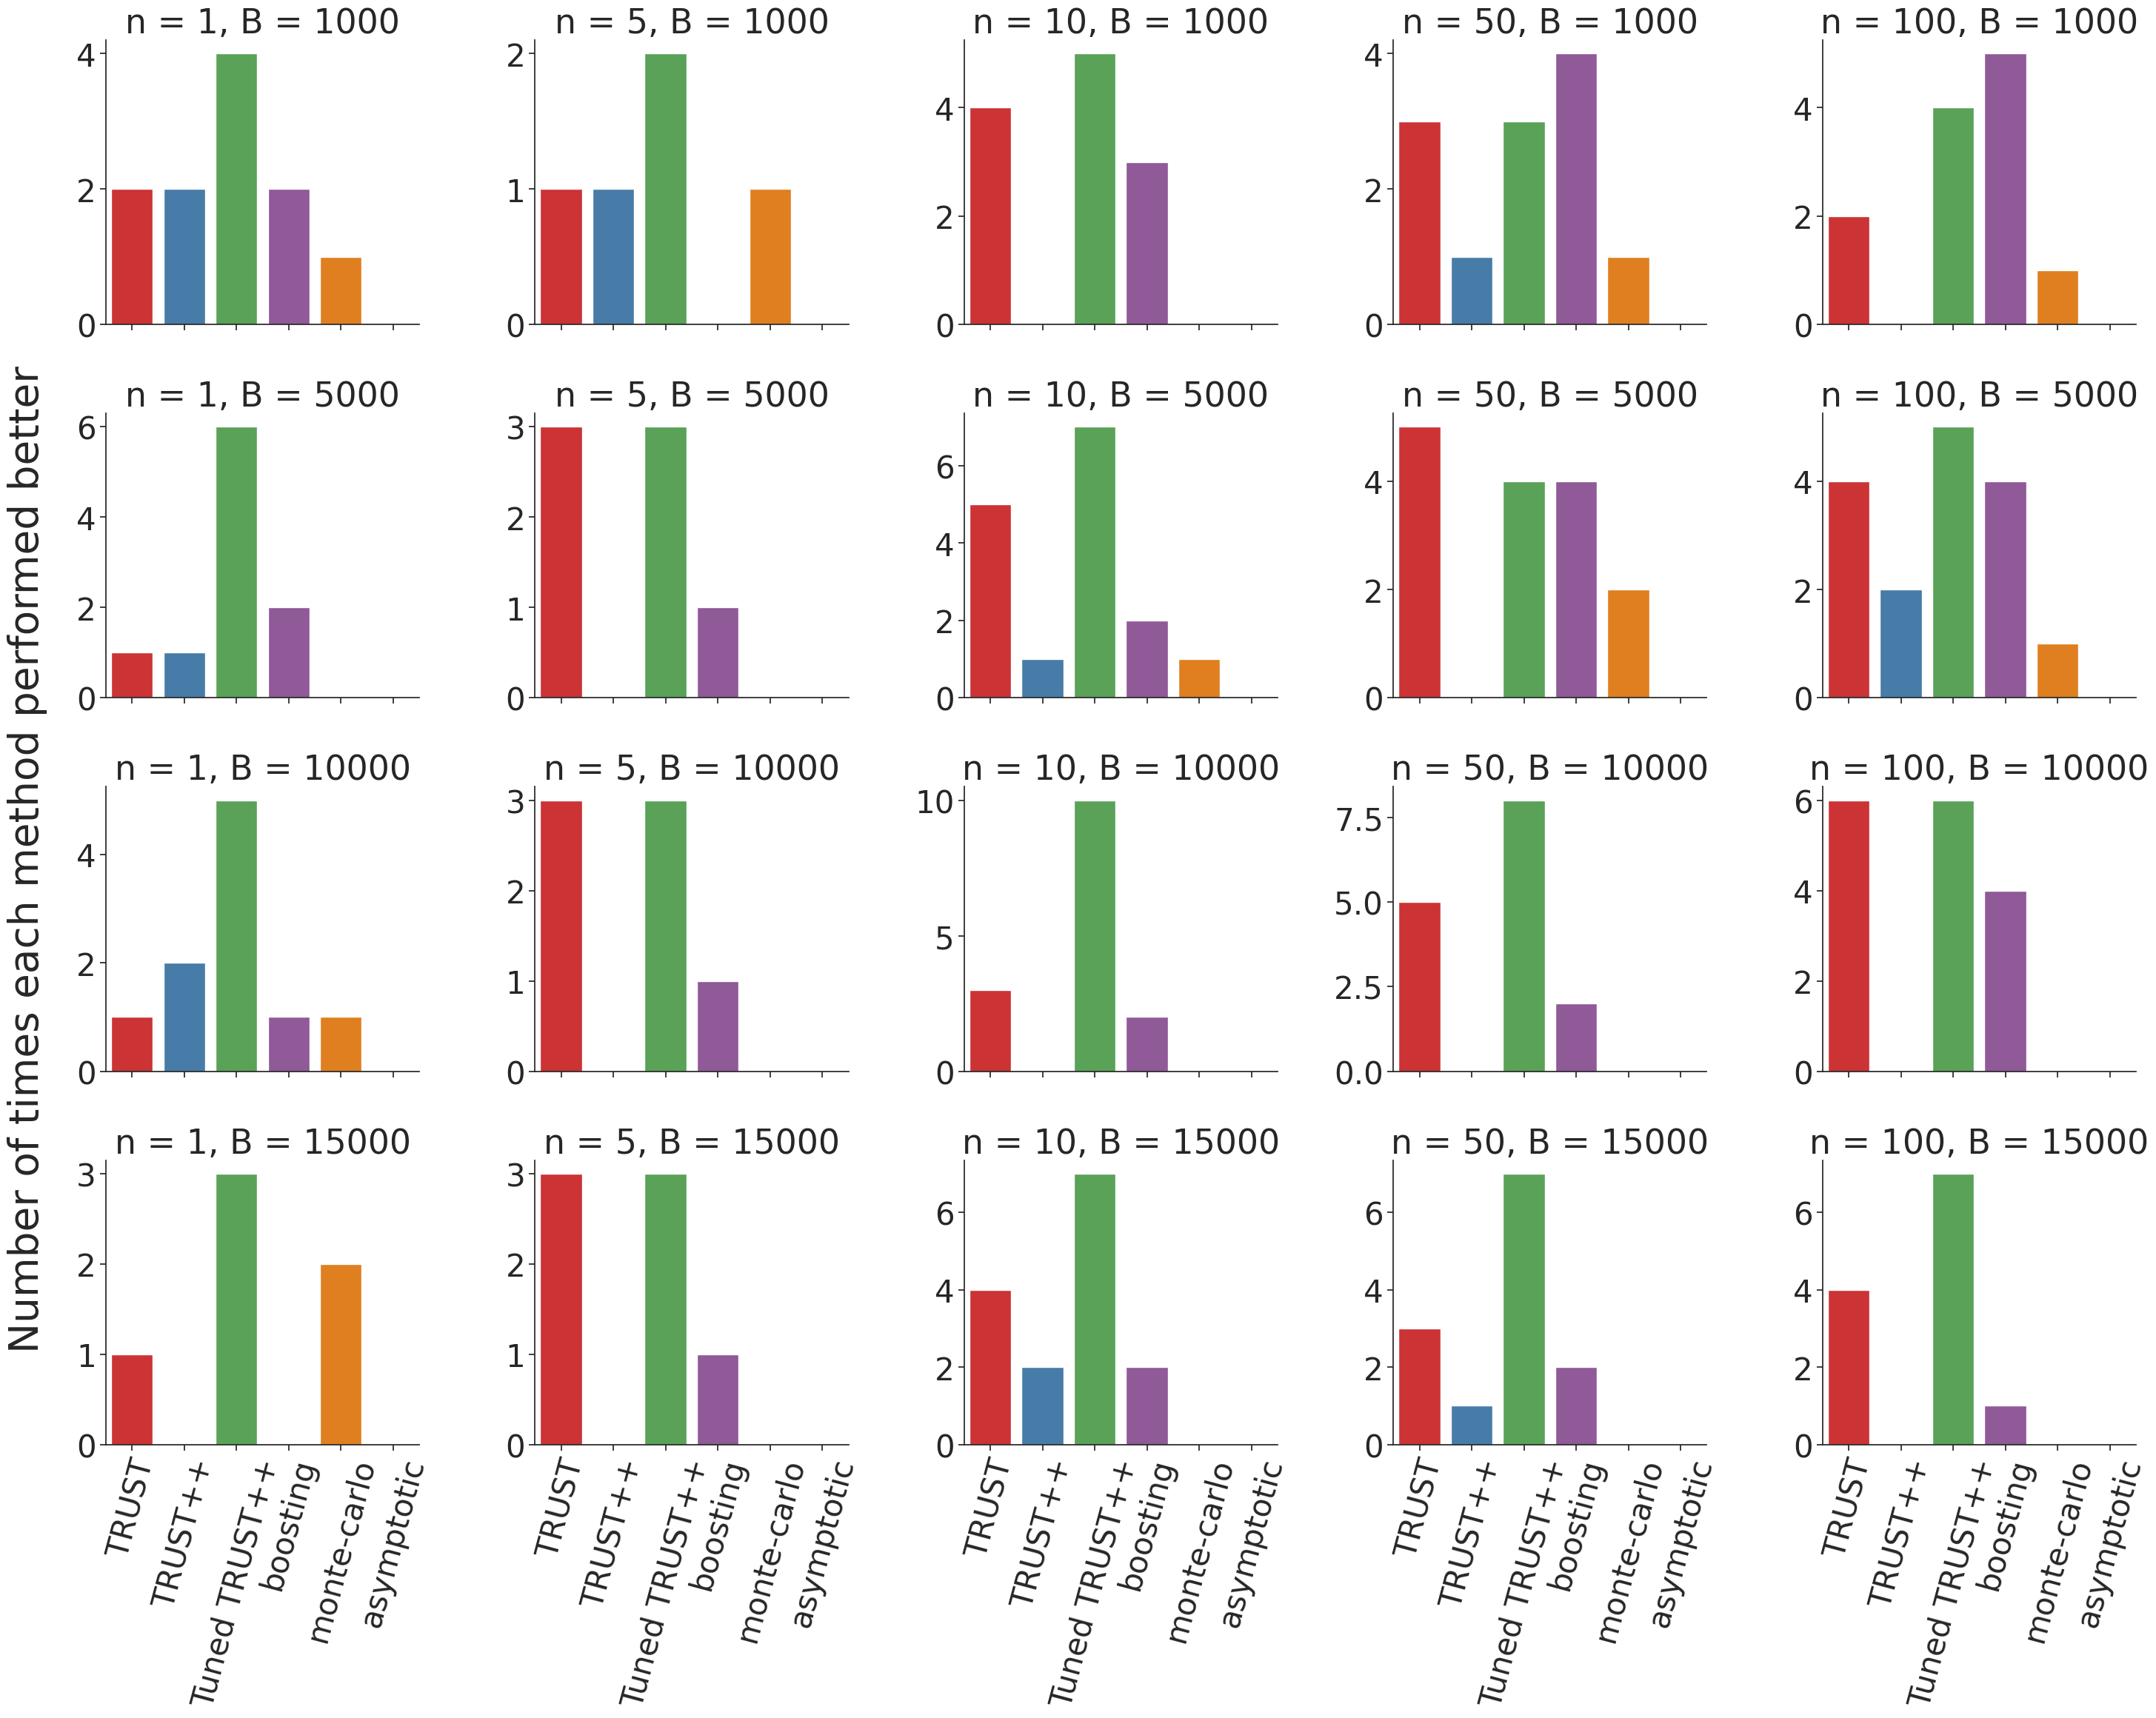

In [36]:
# Set the style of the plot
sns.set(style="ticks", font_scale = 2.75)

# Create a facet grid using catplot
g = sns.catplot(data=method_counts_data, x="methods", y="count", kind="bar", col = "N", row = "B", legend=True, sharey = False, palette = "Set1",
                height = 6, aspect = 1)

# Set the labels and titles
g.set_titles("n = {col_name}, B = {row_name}")
g.set_ylabels("")
g.set_xlabels("")
g.tick_params(axis='x', rotation=75)
g.fig.supylabel('Number of times each method performed better')

# Show the plot
plt.tight_layout()

# Assuming 'g' is the figure you want to save
g.savefig('figures/all_comparissons.pdf', format='pdf')